# Machine Learning Kaggle project
## Google Play Store Apps Project
Amr Mohamed Gaber <br>
March 8th, 2020


## Project Overview
### Problem Statement
This project aims to use the dataset provided by [Lavanya Gupta](https://www.kaggle.com/lava18/google-play-store-apps) to train a supervised machine learning algorithm to predict app ratings.

**A supervised machine learning algorithm** is an algorithm where you feed to the algorithm your training dataset including your desired solutions *'labels'* so it can find correlations between instances in the data which leads to it understanding the dataset better.

To predict the target numerical value `'Rating'`, We will be using Regression Algorithms given a set of predictors *'features'*.

We will be using small functions to do everything, this will help us to automate most of the work done and be able to save time, update and reuse them later or on different machines/algorithms.
like for example:
- in case of downloading/installing the dataset on different/multiple machines, or if the dataset changes regularly.
- reuse some of the transoformation functions on different Machine Learning algorithms.

Our steps through the whole project will be as following:
- Getting the data.
- Data exploration.
- Taking a quick look at the Data Structure.
- Creating a Test set
- Discover and Visualize the data.
- Prepare the Data for Machine Learning.
- Select and Train a Model
- Fine-Tune the Model

## Getting the data
First, We will need to download the dataset using kaggle's api into a new folder we created inside our working directory called ' ..\datasets\gplay\ ', by running the following code:

In [1]:
import os
import kaggle

GPLAY_PATH = os.path.join("datasets", "gplay")
GPLAY_URL = "lava18/google-play-store-apps"

def fetch_gplay_data(gplay_url=GPLAY_URL, gplay_path=GPLAY_PATH):
    '''
    Creates a datasets/gplay directory in your workspace,
    downloads the google-play-store-apps.zip file,
    and extract its files in this directory
    '''
    if not os.path.isdir(gplay_path):
        os.makedirs(gplay_path)
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(gplay_url, path=gplay_path, unzip=True)

In [2]:
fetch_gplay_data()

Then Loading the data from the `googleplaystore.csv` file into our working space by running the following code:

In [3]:
import pandas as pd

def load_gplay_data(gplay_path=GPLAY_PATH):
    csv_path = os.path.join(gplay_path, "googleplaystore.csv")
    return pd.read_csv(csv_path)

In [4]:
gplay = load_gplay_data() 
gplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Data Exploration
The input data consists of 10841 apps. Every Instance cosists of 12 features and 1 output or label target, they are all in text form so we will need to reformat them later.

* **App:** Application name.
* **Category:** Category the app belongs to, there is a total of 33 unique catagory in this dataset.
* **Reviews:** Number of user reviews for the app (as when scraped).
* **Size:** Size of the app (as when scraped).
* **Installs:** Number of user downloads/installs for the app (as when scraped).
* **Type:** Paid or Free.
* **Price:** Price of the app (as when scraped)
* **Content Rating:** Age group the app is targeted at - Children / Mature 21+ / Adult.
* **Genres:** An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres, there is a total of 115 unique genre in this dataset.
* **Rating (label):** Overall user rating of the app (as when scraped).

**THIS features are UNNECESSARY and can be dropped from our dataset without affecting it too much:**
* **Last Updated:** Date when the app was last updated on Play Store (as when scraped).
* **Current Ver:** Current version of the app available on Play Store (as when scraped)
* **Android Ver:** Min required Android version (as when scraped)


In [5]:
gplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
gplay.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Taking a quick look at the Data Structure 
We will go through each feature visualizing it, cleaning it, and breaking it down.

**we will drop NaN values for simplicity, since the objective is to predict the ratings of the apps, also and we cant reformat some values to visualize them without dealing with NaN first.**

In [8]:
gplay.dropna(inplace=True)

we will be using the `In-place` operation which is an operation that changes directly the content of a given linear algebra, 
vector, matrices(Tensor) without making a copy.

Lets start by visualizing the first feature `'Category'`  in a pie chart to figure how many categories are there, and we will use multiple colors from different cmaps to represent each of them:

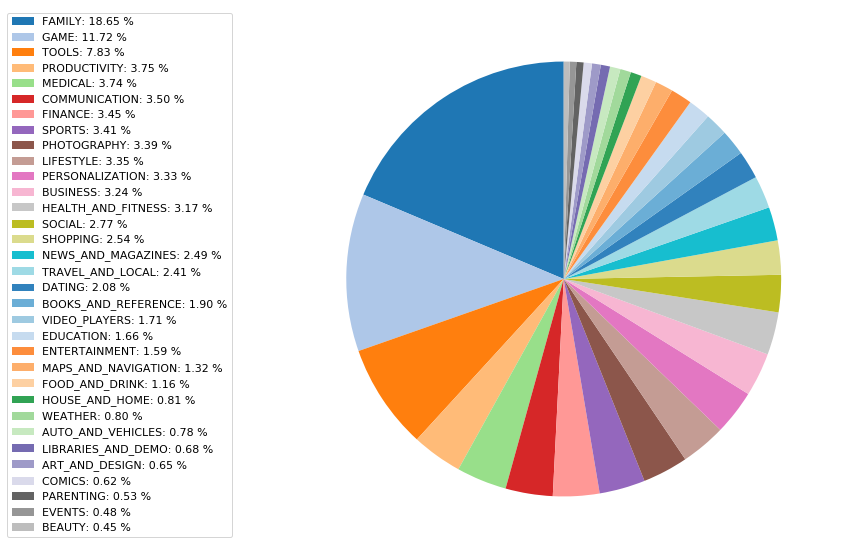

In [9]:
# visualizing 'Category' feature 

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,10))

x = gplay['Category'].value_counts().index #gets the labels
y = gplay['Category'].value_counts() #gets the count for each label
n = gplay['Category'].value_counts().count() #get the total count for this feature

percent = 100.*y/y.sum()

cmap = plt.get_cmap('tab20')
color1 = [cmap(i) for i in np.linspace(0, 1, n//2+1)]
cmap = plt.get_cmap('tab20c')
color2 = [cmap(i) for i in np.linspace(0, 1, n//2+1)]

colors = color1 + color2

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1)

labels = ['{0}: {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = False #incase you want them to be sorted according to their count

if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=11)

plt.savefig('piechart.png', bbox_inches='tight')

Taking a look at the `'Category'` feature shows us that:
- Family, Game, and Tool apps have more than third of the market share.

For `'Reviews'`, we just need to Change it from text values to numerical values.

In [10]:
gplay['Reviews'] = gplay['Reviews'].astype(int)

For `'Size'`, we need to convert all app sizes to MB.

In [11]:
def cleaning_size(size):
        if 'M' in size:
            return float(size[:-1]) * 1_000_000
        elif 'K' in size:
            return float(size[:-1]) * 1_000
        else:
            return None    #for "Varies with device" size

gplay['Size'] = gplay['Size'].map(cleaning_size)
gplay.Size.fillna(method='ffill', inplace=True)    #forwardfill:propagates last valid observation forward

For `'Installs'`, Remove '+' from it to make it numeric.

In [12]:
gplay['Installs'] = [int(num[:-1].replace(',','')) for num in gplay['Installs']]

For `'Type'`, return a 0 for 'Free' apps and 1 for paid apps.

In [13]:
gplay['Type'] = [0  if type_ == 'Free' else 1 for type_ in gplay['Type']]

For `'Price'`, change them to numeric form.

In [14]:
gplay['Price'] = [float(price_[1:])  if '$' in price_ else 0 for price_ in gplay['Price']]

Just using 1 color map is enough for `'Content Rating'`:

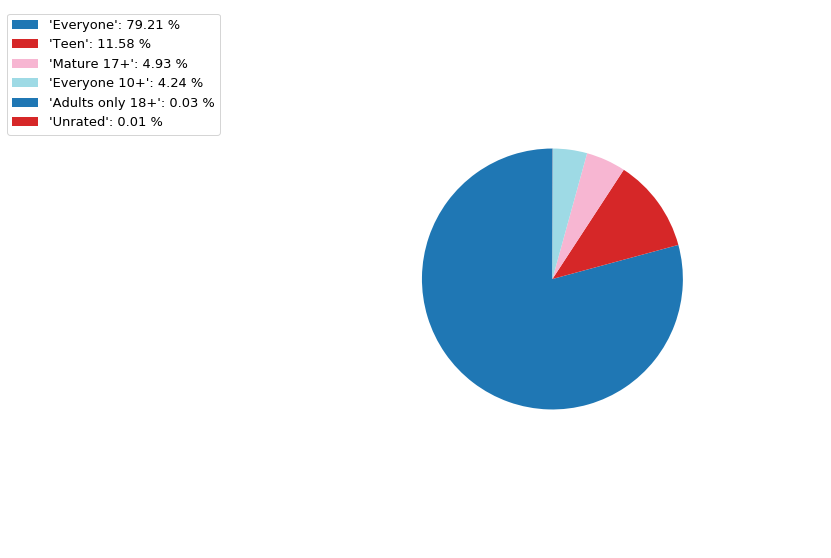

In [15]:
# visualizing 'Content Rating' feature 

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))

x = gplay['Content Rating'].value_counts().index #gets the labels
y = gplay['Content Rating'].value_counts() #gets the count for each label
n = gplay['Content Rating'].value_counts().count() #get the total count for this feature

percent = 100.*y/y.sum()

cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, n//2+1)]


patches, texts = plt.pie(y, colors=colors, startangle=90, radius=0.6)

labels = ['\'{0}\': {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = False #incase you want them to be sorted according to their count

if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=13)

plt.savefig('piechart2.png', bbox_inches='tight')

Taking a look at the `'Content Rating'` feature shows us that:
- Everyone Rating is dominating the market.

After cleaning and reformating our features, we can have more info about our dataset.

In [16]:
gplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int32
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null int64
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 987.2+ KB


In [18]:
gplay.describe()

,Rating,Reviews,Size,Installs,Type,Price
count,9360.000000,9.360000e+03,9.360000e+03,9.360000e+03,9360.000000,9360.000000
mean,4.191838,5.143767e+05,2.373330e+07,1.790875e+07,0.068910,0.961279
std,0.515263,3.145023e+06,2.326294e+07,9.126637e+07,0.253315,15.821640
min,1.000000,1.000000e+00,1.000000e+06,1.000000e+00,0.000000,0.000000
25%,4.000000,1.867500e+02,6.000000e+06,1.000000e+04,0.000000,0.000000
50%,4.300000,5.955000e+03,1.500000e+07,5.000000e+05,0.000000,0.000000
75%,4.500000,8.162750e+04,3.400000e+07,5.000000e+06,0.000000,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,1.000000,400.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE286205C8>,
      dtype=object)

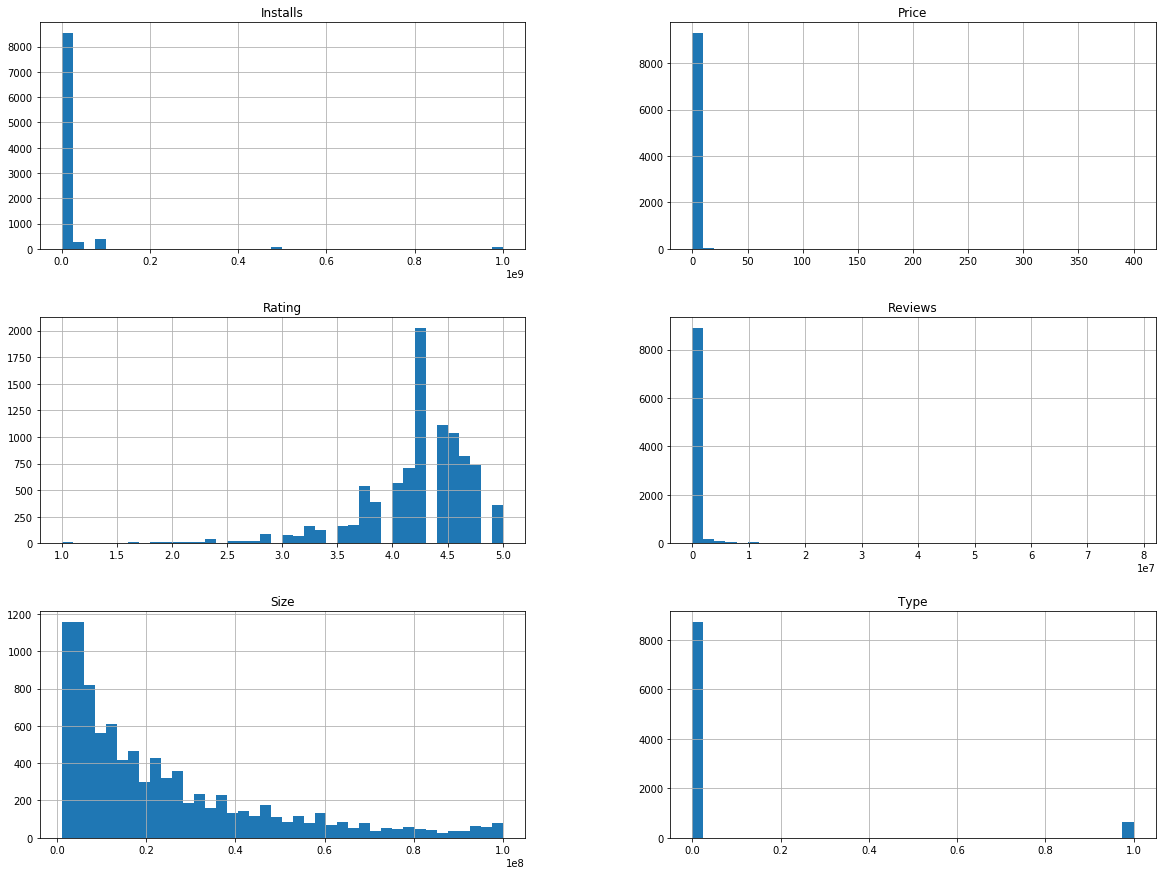

In [19]:
%matplotlib inline
gplay.hist(bins=40, figsize=(20,15))

From the histograms, we find out that:
- the **Everyone** Content rating is dominating the app store just like what we figured out from the pie chart.
- not everyone who rated an app wrote a review.
- the app store are mostly free apps.

# Create a Test Set

After Taking a quick look at the Data Structure of our attributes and changing some of them to get a better visualization and be able to get the most out of them when fed into a machine learning algorithm, we will now create a Test set before taking any major steps.

We will create a test set now before we find any intersting patterns that maybe will influence us to select a particular kind of Machine Learning model which may in turn give us an optimistic estimate, which will make our system not perform as well as expected after launch due to **Snooping bias**.

We will need make another assumption here to create a Test set which isn't skewed, with no bias, and representative for the whole data set, we will be using **Stratified sampling** on `'Category'` feature assuming it is the most important feature for the rating dataset. 
**Stratified sampling** is in most cases a much better option than **Random sampling** which can be skewed.

- **Random sampling** involves the random selection of data from the entire population so each possible sample is equally likely to occur. 
- **Stratified sampling** divides the population into smaller groups, or strata, based on shared characteristics.

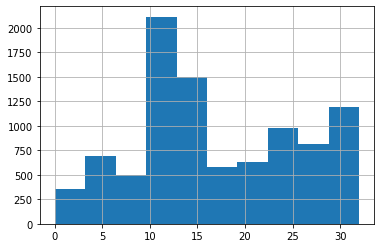

In [20]:
gplay_cat = gplay[["Category"]]

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
gplay_cat_encoded = ordinal_encoder.fit_transform(gplay_cat)
gplay["Category_cat"] = gplay_cat_encoded
gplay["Category_cat"].hist()

To get a list of the caregories represented, use the following:

In [21]:
ordinal_encoder.categories_

[array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
        'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
        'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
        'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
        'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
        'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
        'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
        'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
        'VIDEO_PLAYERS', 'WEATHER'], dtype=object)]

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(gplay, gplay["Category_cat"]):
    strat_train_set = gplay.loc[train_index]
    strat_test_set = gplay.loc[test_index]

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


Now, lets check and see if the test_set follows histogram of `Category_cat` for the full dataset.

In [23]:
strat_test_set["Category_cat"].value_counts() / len(strat_test_set)

11.0    0.159722
14.0    0.098291
29.0    0.068376
20.0    0.040598
25.0    0.033120
24.0    0.033120
12.0    0.030983
15.0    0.028846
26.0    0.027778
23.0    0.027778
4.0     0.027778
18.0    0.027244
6.0     0.026175
27.0    0.025641
28.0    0.022436
3.0     0.021368
7.0     0.019231
31.0    0.019231
8.0     0.017628
30.0    0.017628
21.0    0.014957
9.0     0.014957
13.0    0.012286
19.0    0.011218
16.0    0.008547
1.0     0.008013
32.0    0.008013
5.0     0.007479
17.0    0.005876
22.0    0.004808
10.0    0.004274
0.0     0.004274
2.0     0.003739
Name: Category_cat, dtype: float64

After making our desired test_set, we can now drop the new attribute `'Category_cat'` to get the original databack.

In [24]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Category_cat", axis=1, inplace=True)

## Discover and Visualize
After putting the test_set aside, we can go into more depth in exploring the train_set. Since our data set is quite small, we can work directly on the full set. First we will need a copy to not alter the original dataset

In [25]:
gplay = strat_train_set.copy()

Now, we can look for how much each attribute correlates with `'Rating'` attribute.

In [26]:
corr_matrix = gplay.corr()
corr_matrix["Rating"].sort_values(ascending=False)

Rating      1.000000
Size        0.086284
Reviews     0.064944
Installs    0.047218
Type        0.036922
Price      -0.026860
Name: Rating, dtype: float64

We will start by looking for any evident relationships or patterns between the attributes.

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


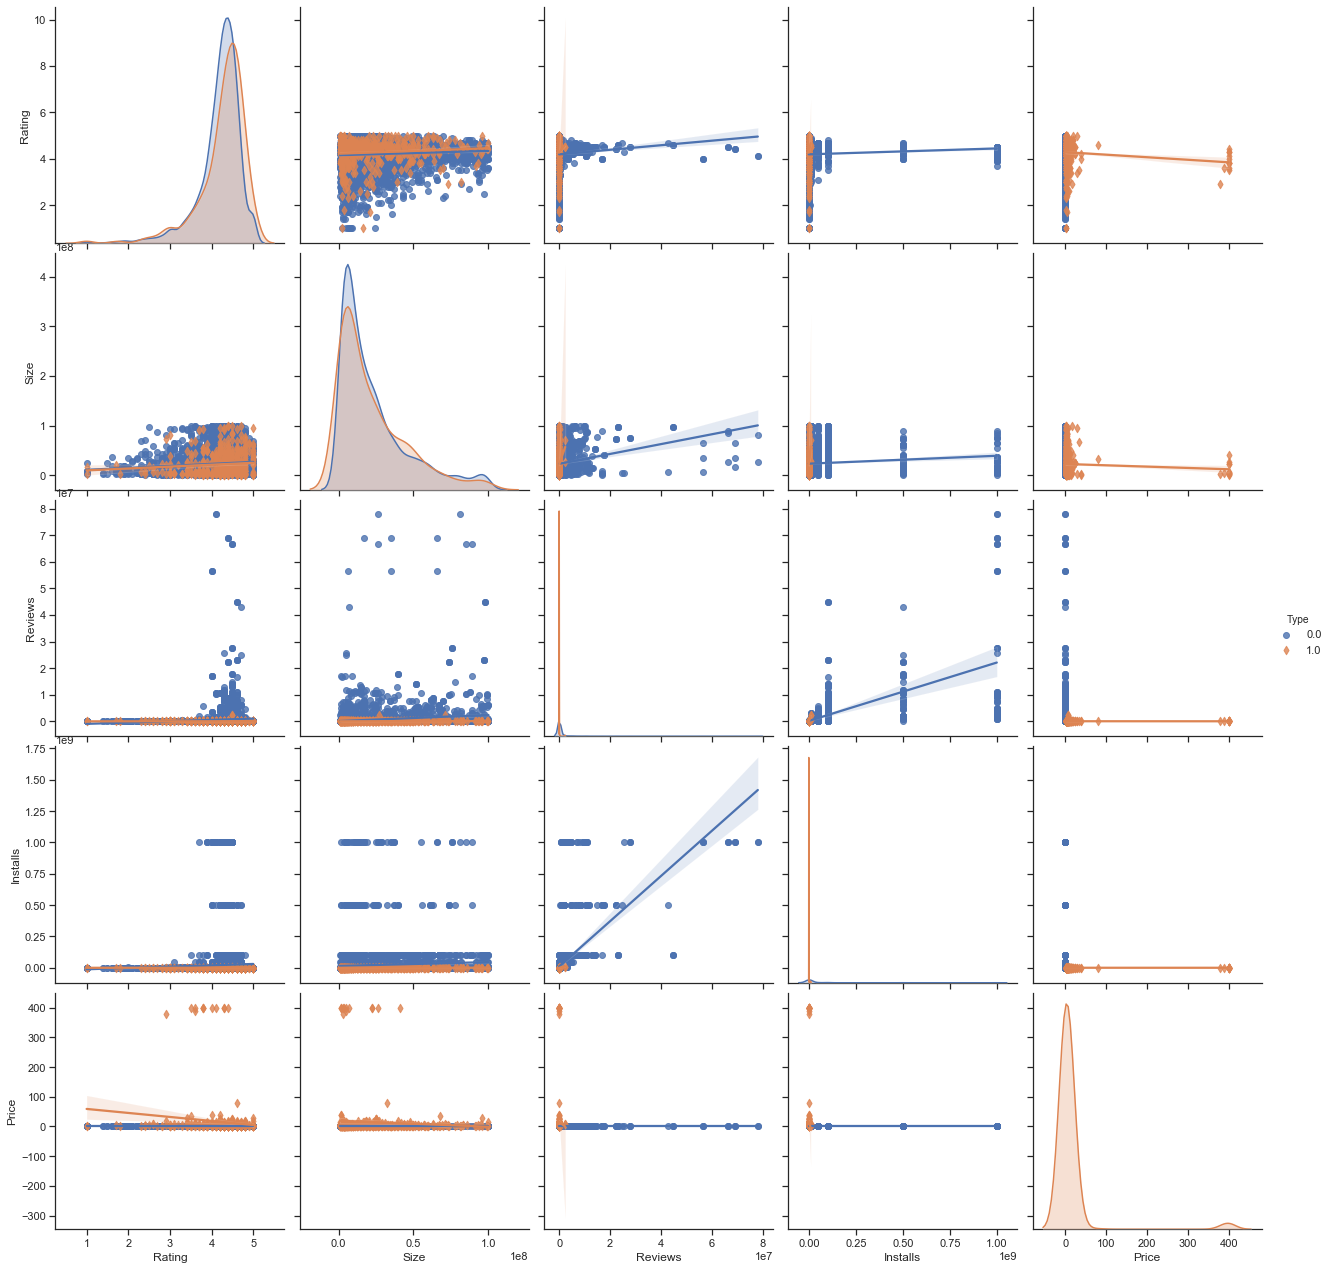

In [27]:
import seaborn as sb
sb.set(style="ticks")
attributes = ["Rating", "Size", "Reviews", "Installs", "Price"]
figure = sb.pairplot(gplay, vars=attributes, height=3.5, hue="Type", markers=["o", "d"], kind="reg")
figure.savefig("relationships.png")

- `0` represents **free** apps.
- `1` represents **paid** apps.

We can now experiment with some attribute combinations, so we can maybe get a more intersting attribute.

In [28]:
gplay["review_per_install"]=gplay["Reviews"]/gplay["Installs"]
gplay["size_per_install"]=gplay["Size"]/gplay["Installs"]
gplay["price_per_install"]=gplay["Price"]/gplay["Installs"]

In [29]:
corr_matrix = gplay.corr()
corr_matrix["Rating"].sort_values(ascending=False)

Rating                1.000000
review_per_install    0.209966
Size                  0.086284
Reviews               0.064944
size_per_install      0.057274
Installs              0.047218
Type                  0.036922
price_per_install     0.019932
Price                -0.026860
Name: Rating, dtype: float64

From taking a look at the correlation matrix, we find out that:
- `'review_per_install'` is much more correlated with the `'Rating'` attribute than `'Reviews'` or `'Installs'`.

But the other combinations didn't help as much, we will do more testing before making a decision but more on that later.

## Preparing the Data for Machine Learning

### Data Cleaning
Let's revert to our clean training set to start applying transformation to it.

In [30]:
gplay = strat_train_set.drop("Rating", axis=1) # drop labels for training set
gplay_labels = strat_train_set["Rating"].copy()
gplay.head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8665,How well do you know me?,GAME,1290.0,6400000.0,100000.0,0.0,0.0,Everyone,Word,"July 26, 2018",2.3.0,4.1 and up
1152,GoBank,FINANCE,5950.0,12000000.0,500000.0,0.0,0.0,Everyone,Finance,"June 1, 2018",2.131,4.1 and up
6134,Photo BG Changer,PHOTOGRAPHY,11.0,17000000.0,1000.0,0.0,0.0,Everyone,Photography,"February 21, 2018",1.3,4.1 and up
7882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3246,File Manager,TOOLS,739329.0,5300000.0,50000000.0,0.0,0.0,Everyone,Tools,"April 17, 2018",Varies with device,Varies with device


Since Most Machine Learning algorithms cannot work with missing features, we will have to deal with the missing values. First lets check how many NaN values are there in each feature.

In [31]:
# np.any(np.isnan(mat))
# np.all(np.isfinite(mat))

gplay.isnull().sum()

App               918
Category          918
Reviews           918
Size              918
Installs          918
Type              918
Price             918
Content Rating    918
Genres            918
Last Updated      918
Current Ver       918
Android Ver       918
dtype: int64

These NaN values resulted from splitting the dataset, so we will have to drop them in this case as they are NaN instances 'apps' rather than some missing values. However, in most cases we can:
- if there is a lot of missing values we can drop the whole attribute.
- if there is only some missing values, we can either swap the NaN values to some other value (like for example 0's or the mean for this attribute), or get rid of the corresponding apps.

In [32]:
gplay.dropna(inplace=True)
gplay_labels.dropna(inplace=True)
gplay.isnull().sum()

App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

#### Assumptions
The features: `'App'`, `'Last Updated'`, `'Current Ver'`, and `'Android Ver'` will have a little to no effect on the training algorithm as they are in my opinion not an important aspect when looking into installing a new app.
- **App:** this contains the app name, and you can make a strong argument it is a needed attribute, but I don't think it is needed for the sake of simplicity.
- **Last Updated:** this can mean that it is a final product and it needs no further improvment or fixes, but can also mean it is abandoned.
* **Current Ver:** this will be different from app to app depending on the developers, so there is no point keeping it.
* **Android Ver:** most of the time, users who can already install the app on their phone and hence do not have an older version of andriord, will only rate the app, also it is backward compatiable so no point in keeping it either.

In [33]:
gplay.drop(labels = ['App', 'Last Updated','Current Ver','Android Ver'], axis = 1, inplace = True)

### Transformers
Lets add the transformers we will be using, we will start by **one-hot encoding** transformer, which convert categorical values into SciPy **sparse matrix** (one-hot vectors).<br> <br>
**a sparse matrix:** is a matrix in which most of the elements are zero. <br> <br>
We will use it later on `'Category'` and `'Generes'` attributes, we only need to initalize it for now.

**one-hot encoding**: when there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |


In [34]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

# gplay_cat = gplay[["Category"]]
# gplay_cat_1hot = cat_encoder.fit_transform(gplay_cat)
# gplay_cat_1hot.toarray()
# cat_encoder.categories_

#WARNING MSG 
#np.seterr(divide='ignore', invalid='ignore')
#np.errstate(divide='ignore',invalid='ignore') # for a block of code

We can add now our **custom transformer**, we will need it to combine the attributes that we got earlier.
We need it to work seamlessly with Scikit-Learn functionalities, so we need to create a class and implement three methods:
- fit() .
- transform() .
- fit_transform() .

We will make each new combined attribute as a **hyperparameter**, which will allow us to easily find out whether adding this attribute helps the Machine Learning algorithms or not. <br><br>
 **hyperparameter** is a parameter whose value is set before the learning process begins.

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

reviews_ix = gplay.columns.get_loc("Reviews")
installs_ix = gplay.columns.get_loc("Installs")
size_ix = gplay.columns.get_loc("Size")
price_ix = gplay.columns.get_loc("Price")

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_review_per_install=True, add_size_per_install=True, add_price_per_install=True):
        # no *args or **kargs
        self.add_review_per_install = add_review_per_install
        self.add_size_per_install = add_size_per_install
        self.add_price_per_install = add_price_per_install
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X):
        y = np.c_[X]
        if self.add_review_per_install:
            review_per_install = X[:, reviews_ix] / X[:, installs_ix]
            y = np.c_[y, review_per_install]
        if self.add_size_per_install:
            size_per_install = X[:, size_ix] / X[:, installs_ix]
            y = np.c_[y, size_per_install]
        if self.add_price_per_install:
            install_per_price = X[:, price_ix] / X[:, installs_ix]
            y = np.c_[y, install_per_price]
        return y



For `'Content Rating'`, We will turn them into numeric values, because they have an order to them unlike `'Genres'` and `'Category'`.

In [36]:
'''
# in case you wanted to do it manually
rating_cat = gplay['Content Rating'].unique()
rating_dict = {rating_cat[i]:i for i in range(len(rating_cat))}
gplay['Content Rating'] = gplay['Content Rating'].map(rating_dict).astype(int)

'''
gplay_cat = gplay[["Content Rating"]]

ordinal_encoder = OrdinalEncoder()
gplay_cat_encoded = ordinal_encoder.fit_transform(gplay_cat)
gplay["Content Rating"] = gplay_cat_encoded


In [37]:
# gplay_cat_encoded[:10]
ordinal_encoder.categories_

[array(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
        'Teen', 'Unrated'], dtype=object)]

### Transformation Pipelines
Because we will be using many data transformations steps that need to be executed in the right order, We will use the **Pipeline** class from Scikit-Learn to help us with such task.

We will need to differentiate between our numerical attributes and categorical attributes, because each type will require different kind of transformations.

In [38]:
gplay_cat = ["Category", "Genres"]
gplay_num = gplay.drop(gplay_cat, axis=1)
num_attribs = list(gplay_num)
cat_attribs = list(gplay_cat)

We can start by making a small **pipeline** for the numerical attributes, **SimpleImputer** should compute the median value on the training set and use it to fill the missing values in the training set, then **StandardScaler** class will Normalize the training set, and finally combine our attributes using our custom transformer **CombinedAttributesAdder**.

**StandardScaler** standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
        ('attribs_adder', CombinedAttributesAdder()),
    ])

#gplay_num_tr = num_pipeline.fit_transform(gplay_num)

Now, Let's apply all the transformations to our data. **ColumnTransformer** applies each transformer to the appropriate
columns and concatenates the outputs along the second axis.

In [40]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

gplay_prepared = full_pipeline.fit_transform(gplay)

looking at our final training set before starting with the Machine Learning Algorithms.

In [41]:
cat_cols = list(full_pipeline.transformers_[1][1].get_feature_names(cat_attribs))
combined_cols = ["price_per_install", "review_per_install", "size_per_install"]

In [42]:
gplay_prepared_attribs = pd.DataFrame(
    gplay_prepared.toarray(),
    columns=num_attribs+combined_cols+cat_cols,
    index=gplay.index)
gplay_prepared_attribs.head()

,Reviews,Size,Installs,Type,Price,Content Rating,price_per_install,review_per_install,size_per_install,Category_ART_AND_DESIGN,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
8665,-0.168157,-0.741520,-0.205721,-0.275025,-0.061729,-0.471717,2.696195,0.748010,1.715181,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1152,-0.166805,-0.501112,-0.201672,-0.275025,-0.061729,-0.471717,1.822063,0.733287,1.715181,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6134,-0.168528,-0.286462,-0.206723,-0.275025,-0.061729,-0.471717,1.041587,0.751653,1.715181,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3246,0.045934,-0.788743,0.299400,-0.275025,-0.061729,-0.471717,2.867900,-1.088629,1.715181,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5091,-0.168525,-0.599851,-0.206632,-0.275025,-0.061729,-0.471717,2.181081,0.751322,1.715181,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
gplay_prepared.shape

(6570, 146)

we now have `146` features after applying every transformation:
- `33` after one hot encoding the `'Category'` attribute .
- `104` after one hot encoding the `'Generes'` attribute.
- `6` for the numerical attributes (`'Reviews'`, `'Size'`, `'Installs'`, `'Type'`, `'Price'`, `'Content Rating'`).
- `3` from the combined attributes we created (`'review_per_install'`, `'size_per_install'`, `'price_per_install'`).

## Select and Train a Model
We will investigate three different supervised algorithms, they are:
- Linear Regression
- Decision Tree
- SVM
- XGBoost

Let's briefly talk about each model to understand them better, we will test them afterwards.

### 1) Linear Regression
**Linear Regression** model is great for learning about the data analysis process. 
However, it isn’t recommended for most practical applications because it oversimplifies real world problems.

###  2) Decision Tree
A **decision tree** is a managerial tool that presents all the decision alternatives and outcomes in a flowchart type of diagram, like a tree with branches and leaves. Each branch of the tree represents a decision option, its cost and the probability that it is likely to occur. The leaves at the end of the branches show the possible payoffs or outcomes. A decision tree illustrates graphically all the possible alternatives, probabilities and outcomes and identifies the benefits of using decision analysis. [1]<br><br>
**Strengths of Decision Tree:**
- Decision trees can handle both categorical and numerical variables at the same time as features. [2]
- Nonlinear relationships between parameters do not affect tree performance [3]
- Decision trees implicitly perform variable screening or feature selection [3]
- The best feature of using trees for analytics - easy to interpret and explain to executives [3]

**Weaknesses of Decision Tree:**
- They can easily overfit. This can be negated by validation methods and pruning, but this is a grey area. [4]
- They can be extremely sensitive to small perturbations in the data where a slight change can result in a drastically         different tree. [4]

**Refrences:**<br>
[**1**](https://smallbusiness.chron.com/advantages-decision-trees-75226.html)<br>
[**2**](https://datascience.stackexchange.com/questions/32622/how-to-make-a-decision-tree-when-i-have-both-continous-and-categorical-variables)<br>
[**3**](http://www.simafore.com/blog/bid/62333/4-key-advantages-of-using-decision-trees-for-predictive-analytics)<br>
[**4**](https://stats.stackexchange.com/questions/1292/what-is-the-weak-side-of-decision-trees)

###  3) SVM
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification (SVC) or regression (SVR) challenges. In the SVM algorithm, we use a mechanism called kernels, which essentially calculate distance between two observations by plotting each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we find a decision boundary that maximizes the distance between the closest members of separate classes.[1]

**Strengths of SVM:**
- SVM's can model non-linear decision boundaries, and there are many kernels to choose from. They are also fairly robust against overfitting, especially in high-dimensional space. [1]

**Weaknesses of SVM:**
- However, SVM's are memory intensive, trickier to tune due to the importance of picking the right kernel, and don't scale well to larger datasets. Currently in the industry, random forests are usually preferred over SVM's. [1]

**Refrences:**<br>
[**1**](https://elitedatascience.com/machine-learning-algorithms)

###  4) XGBoost
XGBoost is an efficient and easy to use algorithm which delivers high performance and accuracy as compared to other algorithms. XGBoost is also known as regularized version of GBM. [1] <br><br>
**Strengths of XGBoost:**
- *Regularization:* XGBoost has in-built L1 and L2 regularization which prevents the model from overfitting. That is why, XGBoost is also called regularized form of GBM (Gradient Boosting Machine). [1]
- *Handling Missing Values:* XGBoost has an in-built capability to handle missing values. When XGBoost encounters a missing value at a node, it tries both the left and right hand split and learns the way leading to higher loss for each node. It then does the same when working on the testing data. [1]
- *Cross Validation:* XGBoost allows user to run a cross-validation at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run. This is unlike GBM where we have to run a grid-search and only a limited values can be tested. [1]

**Weaknesses of XGBoost:**
- It can be slow. [2]
- It can create a complex model. [2]

**Refrences:**<br>
[**1**](http://theprofessionalspoint.blogspot.com/2019/03/advantages-of-xgboost-algorithm-in.html) <br>
[**2**](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/ )

we can now start training and evaluating our models.

## Training and Evaluating on the Training Set

We will train all our models with the default parameters first, Let's start with Linear Regression.

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(gplay_prepared, gplay_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We will try it out on some instances from our training set and compare it to its original label(value).

In [46]:
head = 5
some_data = gplay.iloc[:head]
some_labels = gplay_labels.iloc[:head]

some_data_prepared = full_pipeline.transform(some_data)

print("Actual Value:", list(some_labels))
print("Predictions:", lin_reg.predict(some_data_prepared))

Actual Value: [3.9, 4.4, 3.8, 4.6, 3.9]
Predictions: [4.3499178  4.12295271 4.19025271 4.04478471 4.35498392]


The predictions aren't that accurate but we can measure its **RMSE (The root-mean-square deviation or root-mean-square error)** which is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.

In [48]:
from sklearn.metrics import mean_squared_error

gplay_predictions = lin_reg.predict(gplay_prepared)
lin_mse = mean_squared_error(gplay_labels, gplay_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.4929729152778508

It appears that our model is decent with almost **12%** error, but we can do better.

Let's try the Decision Tree next.

In [49]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(gplay_prepared, gplay_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

Then we will do our small comparision.

In [50]:
print("Actual Value:", list(some_labels))
print("Predictions:", tree_reg.predict(some_data_prepared))

Actual Value: [3.9, 4.4, 3.8, 4.6, 3.9]
Predictions: [3.9 4.4 3.8 4.6 3.9]


The predictions looks perfect, We will measure **RMSE** to get the exact error if it exists.

In [51]:
gplay_predictions = tree_reg.predict(gplay_prepared)
tree_mse = mean_squared_error(gplay_labels, gplay_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.007453559924999297

the **0%** error means that it is much more likely our model has badly **overfit** the data.<br>
**Overfitting:** the model preforms too well on the training data only and may therefore fail to fit additional data or predict future observations reliably

Let's try the SVM next.

In [53]:
from sklearn.svm import SVR

svr_reg = SVR()
svr_reg.fit(gplay_prepared, gplay_labels)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Then we will do our small comparision.

In [54]:
print("Actual Value:", list(some_labels))
print("Predictions:", svr_reg.predict(some_data_prepared))

Actual Value: [3.9, 4.4, 3.8, 4.6, 3.9]
Predictions: [4.31063814 4.29941393 4.20811858 4.30305594 4.40912135]


The Predictions varies between the data, We will need to measure **RMSE** to get an approximation.

In [55]:
gplay_predictions = svr_reg.predict(gplay_prepared)
svr_mse = mean_squared_error(gplay_labels, gplay_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

0.4986974387735443

It appears that our model is as good as our Linear regression model, with a difference between them **2%** error.

Finally, Let's try the XGBoost.

In [56]:
import xgboost as xgb 

xgb_reg = xgb.XGBRegressor(random_state=42, silent=True)
xgb_reg.fit(gplay_prepared, gplay_labels)

C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, verbosity=1)

Then we will do our small comparision.

In [57]:
print("Actual Value:", list(some_labels))
print("Predictions:", xgb_reg.predict(some_data_prepared))

Actual Value: [3.9, 4.4, 3.8, 4.6, 3.9]
Predictions: [3.994983  4.153594  3.925327  4.359478  4.1238623]


The Predictions varies between the data, We will need to measure **RMSE** to get an approximation.

In [58]:
gplay_predictions = xgb_reg.predict(gplay_prepared)
xgb_mse = mean_squared_error(gplay_labels, gplay_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

0.4424193926537391

It appears that our model is better than the Linear regression model, with almost **11%** error.

We will get better evaluations on the **Linear Regression**, **Decision Tree**, **SVM**,and the **XGBoost** by using Scikit-Learn’s K-fold **cross-validation** feature.<br><br>
[**K-Folds Cross-validation:**](https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f) Split the entire data randomly into k folds, Then fit the model using the (K-1) folds and validate the model using the remaining Kth fold, Repeat this process until every K-fold serve as the test set. Then take the average of your recorded scores. That will be the performance metric for the model, this ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data. 

We start by our linear regression model:

In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, gplay_prepared, gplay_labels,
                         scoring="neg_mean_squared_error", cv=10)
gplay_rmse_scores = np.sqrt(-scores)
gplay_rmse_scores.mean()

0.4986513555110406

Followed by our Decision Tree model:

In [60]:
scores = cross_val_score(tree_reg, gplay_prepared, gplay_labels,
                         scoring="neg_mean_squared_error", cv=10)
gplay_rmse_scores = np.sqrt(-scores)
gplay_rmse_scores.mean()

0.615534079868363

Followed by our SVM model:

In [68]:
# you can remove it with no effect on the model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

scores = cross_val_score(svr_reg, gplay_prepared, gplay_labels,
                         scoring="neg_mean_squared_error", cv=10)
gplay_rmse_scores = np.sqrt(-scores)
gplay_rmse_scores.mean()

0.5027243140310812

And Finally, We try our XGBoost model:

In [69]:
scores = cross_val_score(xgb_reg, gplay_prepared, gplay_labels,
                         scoring="neg_mean_squared_error", cv=10)
gplay_rmse_scores = np.sqrt(-scores)
gplay_rmse_scores.mean()

0.4669635511812569

From the looks of it, we found out that:
- **Linear Regression** got the same error value and most likely its limit.
- **Decision Tree** is overfitting and preforming worse than the other two.
- **SVR** is a great model, it is the main candidate to be our main model.
- **XGBoost** is good model, and the other cadidate to be our main model.

We will plot the learning curve for each model to get more insights on which model is the better model.

In [63]:
from sklearn.model_selection import learning_curve
%matplotlib inline

# It is good to randomize the data before drawing Learning Curves
from sklearn.model_selection import ShuffleSplit, train_test_split

def draw_learning_curves(X, y, estimator, num_trainings):
    cv1 = ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv1, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings),scoring = 'r2')
    
    print("train size :\n",train_sizes)
    print()
    train_scores_mean = np.mean(train_scores, axis=1)
    print("train score mean:\n",train_scores_mean)
    print()
    #train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #test_scores_std = np.std(test_scores, axis=1)

    plt.grid();

    plt.title("Learning Curves");
    plt.xlabel("Training examples");
    plt.ylabel("Score");

    plt.plot(train_sizes,train_scores_mean, 'o-', color="g",
             label="Training score");
    plt.plot(train_sizes,test_scores_mean, 'o-', color="y",
             label="Cross-validation score");
    plt.legend(loc="best");
    


train size :
 [ 525 1051 1576 2102 2628 3153 3679 4204 4730 5256]

train score mean:
 [0.15271264 0.1066187  0.08546114 0.07617493 0.07148316 0.06696588
 0.06477805 0.06310894 0.06070058 0.05925619]



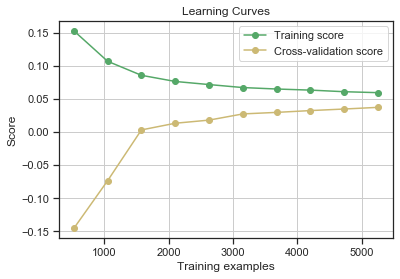

In [64]:
draw_learning_curves(gplay_prepared, gplay_labels, lin_reg, 10)

train size :
 [ 525 1051 1576 2102 2628 3153 3679 4204 4730 5256]

train score mean:
 [1.         1.         0.99998782 0.99999124 0.99999296 0.99999408
 0.99992116 0.9998969  0.99987933 0.99985515]



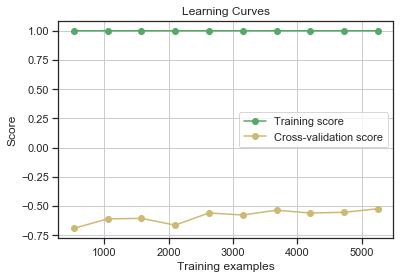

In [65]:
draw_learning_curves(gplay_prepared, gplay_labels, tree_reg, 10)

train size :
 [ 525 1051 1576 2102 2628 3153 3679 4204 4730 5256]

train score mean:
 [0.06292702 0.04775674 0.04356995 0.04126765 0.04098916 0.04004547
 0.03867243 0.03810515 0.03605293 0.03479692]



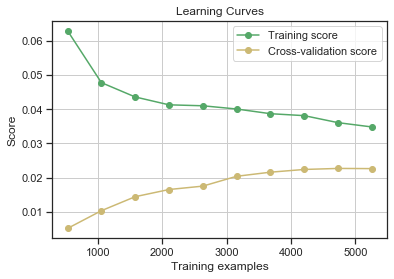

In [66]:
draw_learning_curves(gplay_prepared, gplay_labels, svr_reg, 10)

train size :
 [ 525 1051 1576 2102 2628 3153 3679 4204 4730 5256]

train score mean:
 [0.52974522 0.40803895 0.36198926 0.33450449 0.31332017 0.29452483
 0.27933482 0.2635035  0.25548206 0.24554606]



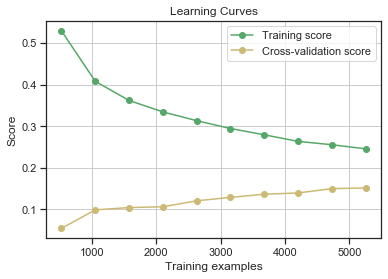

In [67]:
draw_learning_curves(gplay_prepared, gplay_labels, xgb_reg, 10)

After plotting our learning curves, we found out that:
- **Linear Regression** is underfitting (high bias).
- **Decision Tree** is overfitting (high variance).
- **SVR** is overall our best model.
- **XGBoost** is not as good as our SVR model, but still a good model to consider.

## Fine-Tune our Models

We can try multiple different hyperparameters manually until we find our a good combination of hyperparameter values, which will consume alot of time and we might end up not finding a great combination of hyperparameters.

So instead, we will use Scikit-Learn’s **GridSearchCV** to search the best hyperparamter values for us, by giving it multiple values for the hyperparameters you want to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values.

(2x8x5)x5

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ["rbf", "sigmoid"], 'C': [1, 5, 10, 15, 20, 25, 50, 100], 'epsilon': [0, 1, 0.1, 0.001, 0.0001]}
  ]

svr_reg = SVR()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(svr_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(gplay_prepared, gplay_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 5, 10, 15, 20, 25, 50, 100],
                          'epsilon': [0, 1, 0.1, 0.001, 0.0001],
                          'kernel': ['rbf', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

We can check the best estimator directly:

In [72]:
grid_search.best_estimator_

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5058505682673902 {'C': 1, 'epsilon': 0, 'kernel': 'rbf'}
22.10045588927101 {'C': 1, 'epsilon': 0, 'kernel': 'sigmoid'}
0.5908174115138345 {'C': 1, 'epsilon': 1, 'kernel': 'rbf'}
21.447542483382783 {'C': 1, 'epsilon': 1, 'kernel': 'sigmoid'}
0.503925099884137 {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
22.87991124644843 {'C': 1, 'epsilon': 0.1, 'kernel': 'sigmoid'}
0.5058620000314592 {'C': 1, 'epsilon': 0.001, 'kernel': 'rbf'}
22.066689458328113 {'C': 1, 'epsilon': 0.001, 'kernel': 'sigmoid'}
0.5058420144585676 {'C': 1, 'epsilon': 0.0001, 'kernel': 'rbf'}
22.015807420634424 {'C': 1, 'epsilon': 0.0001, 'kernel': 'sigmoid'}
0.5041373886602537 {'C': 5, 'epsilon': 0, 'kernel': 'rbf'}
110.64069575196844 {'C': 5, 'epsilon': 0, 'kernel': 'sigmoid'}
0.5964343191046783 {'C': 5, 'epsilon': 1, 'kernel': 'rbf'}
114.18263704585357 {'C': 5, 'epsilon': 1, 'kernel': 'sigmoid'}
0.5022290536440825 {'C': 5, 'epsilon': 0.1, 'kernel': 'rbf'}
113.01795331467675 {'C': 5, 'epsilon': 0.1, 'kernel': 'sigmoid'}
0

In [98]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Rating", axis=1)
y_test = strat_test_set["Rating"].copy()

X_test.dropna(inplace=True)
y_test.dropna(inplace=True)
X_test.isnull().sum()
X_test.drop(labels = ['App', 'Last Updated','Current Ver','Android Ver'], axis = 1, inplace = True)

X_test_cat = X_test[["Content Rating"]]

ordinal_encoder = OrdinalEncoder()
X_test_cat_encoded = ordinal_encoder.fit_transform(X_test_cat)
X_test["Content Rating"] = X_test_cat_encoded

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres
1951,GAME,37139.0,49000000.0,1000000.0,0.0,0.0,1.0,Action
3018,SPORTS,521138.0,27000000.0,10000000.0,0.0,0.0,1.0,Sports
5618,GAME,1041836.0,50000000.0,10000000.0,0.0,0.0,3.0,Action
7008,FAMILY,767.0,18000000.0,100000.0,0.0,0.0,0.0,Entertainment
5916,FAMILY,1734.0,5800000.0,500000.0,0.0,0.0,0.0,Strategy


In [103]:
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

ValueError: X.shape[1] = 126 should be equal to 146, the number of features at training time

 
# TBA TBA TBA TBA TBA TBA

from sklearn.metrics import accuracy_score
##############################################
#### Note: Recap of accuracy, precision, recall

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

**Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).
###################################
import joblib
# to save our model
joblib.dump(my_model, "my_model.pkl")
# to load our model
my_model_loaded = joblib.load("my_model.pkl")